# Агрегирование данных и групповые операции

In [1]:
import numpy as np
import pandas as pd

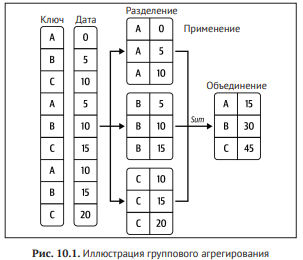

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data1 = titanic_data.loc[: ,['Age','Sex','Fare','Embarked','Pclass','Survived']]
data1.head()
age_categories = pd.cut(data1['Age'],[0,5,14,25,35,60,90],labels=['0-5','5-14','14-25','25-35','35-60','60+'])
data1['age_category'] = age_categories
data1['age_category']
data1

,Age,Sex,Fare,Embarked,Pclass,Survived,age_category
0,22.0,male,7.2500,S,3,0,14-25
1,38.0,female,71.2833,C,1,1,35-60
2,26.0,female,7.9250,S,3,1,25-35
3,35.0,female,53.1000,S,1,1,25-35
4,35.0,male,8.0500,S,3,0,25-35
...,...,...,...,...,...,...,...
886,27.0,male,13.0000,S,2,0,25-35
887,19.0,female,30.0000,S,1,1,14-25
888,NaN,female,23.4500,S,3,0,NaN
889,26.0,male,30.0000,C,1,1,25-35


### Группировка data.groupby()

In [5]:
grouped = data1.groupby('Survived')  # объект GroupBy - сгруппированные данные

# применим метод mean для сгруппированных данных
grouped.mean()

,Age,Fare,Pclass
Survived,,,
0,30.626179,22.117887,2.531876
1,28.343690,48.395408,1.950292


In [6]:
# лучше делать всё "на месте"

data1.groupby(['age_category']).mean() # средние значения по всем столбцам (числовым)

# были выкинуты нечисловые значения!

,Age,Fare,Pclass,Survived
age_category,,,,
0-5,2.503864,31.528030,2.568182,0.704545
5-14,9.969697,32.462376,2.696970,0.424242
14-25,20.678571,30.252213,2.464286,0.352679
25-35,30.303571,30.592323,2.295918,0.423469
35-60,44.830769,44.259658,1.835897,0.400000
60+,66.022727,41.371214,1.590909,0.227273


In [7]:
# можно группировать отдельные столбцы, а не всего датафрейма

data1['Age'].groupby(data1['Sex']).mean()  # группируется возраст ПО ПОЛУ (среднее от возраста и группировка по полу!)bb

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [8]:
# ВНИМАНИЕ на скобки! можно комбинировать группировки, но ОСТОРОЖНО

data1['Age'].groupby([data1['Pclass'],data1['Sex']]).mean()  # серия с иерархической индексацией

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

  - методы size() и count()

In [11]:
data1.groupby(['age_category','Sex'],dropna=False).size()  # размеры групп

# данные, соответствующие отсутствующим в групповом ключе значениям, по умолчанию исключаются из результата (dropna=True)

age_category  Sex   
0-5           female     21
              male       23
5-14          female     17
              male       16
14-25         female     84
              male      140
25-35         female     66
              male      130
35-60         female     70
              male      125
60+           female      3
              male       19
dtype: int64

In [12]:
data1.groupby(['age_category','Sex']).count()

Age  Fare  Embarked  Pclass  Survived
age_category Sex                                          
0-5          female   21    21        21      21        21
             male     23    23        23      23        23
5-14         female   17    17        17      17        17
             male     16    16        16      16        16
14-25        female   84    84        84      84        84
             male    140   140       140     140       140
25-35        female   66    66        66      66        66
             male    130   130       130     130       130
35-60        female   70    70        69      70        70
             male    125   125       125     125       125
60+          female    3     3         2       3         3
             male     19    19        19      19        19

Итак, основное отличие между count() и size() заключается в том, что count() возвращает датафрейм с количеством непропущенных значений в каждом столбце, а size() возвращает объект Series с количеством записей (включая дубликаты) в каждой группе.

### Обход групп

Объект, возвращенный groupby, поддерживает итерирование, в результате которого генерируется последовательность 2-кортежей, содержащих имя группы 
и блок данных.

In [13]:
for name, group in data1.groupby(data1['Sex']):
    print(name)
    print(group)
    
# В случае нескольких ключей первым элементом кортежа будет кортеж, содержащий значения ключе

female
      Age     Sex     Fare Embarked  Pclass  Survived age_category
1    38.0  female  71.2833        C       1         1        35-60
2    26.0  female   7.9250        S       3         1        25-35
3    35.0  female  53.1000        S       1         1        25-35
8    27.0  female  11.1333        S       3         1        25-35
9    14.0  female  30.0708        C       2         1         5-14
..    ...     ...      ...      ...     ...       ...          ...
880  25.0  female  26.0000        S       2         1        14-25
882  22.0  female  10.5167        S       3         0        14-25
885  39.0  female  29.1250        Q       3         0        35-60
887  19.0  female  30.0000        S       1         1        14-25
888   NaN  female  23.4500        S       3         0          NaN

[314 rows x 7 columns]
male
      Age   Sex     Fare Embarked  Pclass  Survived age_category
0    22.0  male   7.2500        S       3         0        14-25
4    35.0  male   8.0500      

### Выборка столбца или подмножества столбцов

In [14]:
# для удобства можно писать

data1.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [15]:
# вместо 
data1['Survived'].groupby(data1['Sex']).count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [16]:
# для получения DataFrame вместо Series нужны доп. скобки [ ]
data1.groupby('Sex')[['Survived']].count()

,Survived
Sex,
female,314
male,577


### Группировка с помощью словарей и объектов Series

Информацию о группировке можно передавать не только в виде массива (правильной длинны).
Но и словаря с правильным соотвествием.

### Группировка с помощью функций

In [17]:
football_data = pd.read_csv('data_football')
football_data.set_index('name', inplace=True)  # inplace - преобразование "на месте"
football_data

,speed,shoot,dribbling,pas,phy,def,rating,position
name,,,,,,,,
messi,7,10,10,10,7,6,91,attack
ronaldo,8,9,7,6,9,5,81,attack
neymar,9,7,9,8,6,5,81,attack
ibra,6,7,7,7,8,6,76,middle
mbappe,10,8,8,7,7,4,81,attack
ramos,6,7,5,7,7,9,76,defender
alba,7,6,6,8,6,7,75,defender
modric,7,8,7,9,7,7,83,middle
xavi,7,7,8,9,6,8,83,defender


In [18]:
# группировка по длине имени

football_data.groupby(len).mean()

,speed,shoot,dribbling,pas,phy,def,rating
name,,,,,,,
4,6.666667,6.666667,7.0,8.0,6.666667,7.000000,78.000000
5,6.500000,8.500000,7.5,8.5,7.000000,7.500000,83.500000
6,8.666667,7.666667,8.0,8.0,6.666667,5.333333,81.666667
7,8.500000,8.500000,6.5,6.0,9.500000,5.000000,81.000000
9,7.000000,8.000000,7.0,10.0,7.000000,7.000000,85.000000


In [19]:
football_data.groupby(str.upper, axis=1).sum()   # то же но для столбцов 

,DEF,DRIBBLING,PAS,PHY,POSITION,RATING,SHOOT,SPEED
name,,,,,,,,
messi,6,10,10,7,attack,91,10,7
ronaldo,5,7,6,9,attack,81,9,8
neymar,5,9,8,6,attack,81,7,9
ibra,6,7,7,8,middle,76,7,6
mbappe,4,8,7,7,attack,81,8,10
ramos,9,5,7,7,defender,76,7,6
alba,7,6,8,6,defender,75,6,7
modric,7,7,9,7,middle,83,8,7
xavi,8,8,9,6,defender,83,7,7


### Группировка по уровням индекса

Иерархически индексированные наборы данных можно агрегировать по одному из уровней индекса оси.

In [20]:
football_data1 = football_data.reset_index()   # сброс индексов
football_data1 = football_data1.set_index(['position','name'])

football_data1.groupby(level='position').mean() 
# Для группировки по уровню нужно передать номер или имя уровня в именованном параметре level

,speed,shoot,dribbling,pas,phy,def,rating
position,,,,,,,
attack,8.600000,8.400000,8.000000,7.400000,7.800000,5.000000,83.000000
defender,6.666667,6.666667,6.333333,8.000000,6.333333,8.000000,78.000000
middle,6.666667,7.666667,7.000000,8.666667,7.333333,6.666667,81.333333


In [21]:
football_data.groupby('position').mean()  # ну или не использовать иерархические индексы)))

,speed,shoot,dribbling,pas,phy,def,rating
position,,,,,,,
attack,8.600000,8.400000,8.000000,7.400000,7.800000,5.000000,83.000000
defender,6.666667,6.666667,6.333333,8.000000,6.333333,8.000000,78.000000
middle,6.666667,7.666667,7.000000,8.666667,7.333333,6.666667,81.333333


##  Агрегирование данных

Под аггрегированием обычно понимается любое преобразование данных, которое порождает скалярные значения из массива.
mean, count, min и sum. Реализации многих стандартных операций агрегирования, в частности перечисленных в табл. 10.1, оптимизированы. Однако необязательно ограничиваться только этими методами.

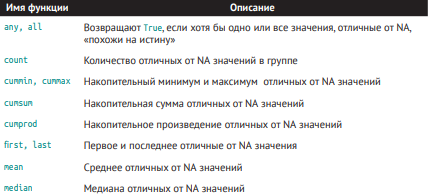
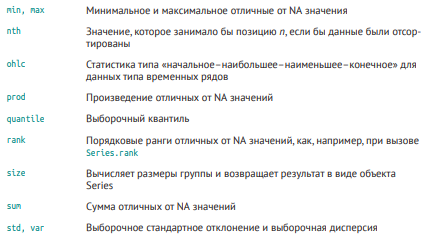

In [23]:
data1.groupby('Sex').agg('mean')   # среднее

,Age,Fare,Pclass,Survived
Sex,,,,
female,27.915709,44.479818,2.159236,0.742038
male,30.726645,25.523893,2.389948,0.188908


In [24]:
data1.groupby('Sex').mean()

,Age,Fare,Pclass,Survived
Sex,,,,
female,27.915709,44.479818,2.159236,0.742038
male,30.726645,25.523893,2.389948,0.188908


In [25]:
data1.groupby('Sex').agg(['mean', 'count'])   # названия

C:\Users\dermi\AppData\Local\Temp\ipykernel_22228\2772501497.py:1: FutureWarning: ['Embarked', 'age_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('Sex').agg(['mean', 'count'])   # названия


Age             Fare          Pclass        Survived      
             mean count       mean count      mean count      mean count
Sex                                                                     
female  27.915709   261  44.479818   314  2.159236   314  0.742038   314
male    30.726645   453  25.523893   577  2.389948   577  0.188908   577

In [26]:
# то же самое, что и
data1.groupby('Sex').var()

,Age,Fare,Pclass,Survived
Sex,,,,
female,199.096233,3363.732930,0.734946,0.192029
male,215.449579,1860.909702,0.661913,0.153488


agg() становится полезным, когда вам нужно выполнить несколько агрегаций сразу или когда вам нужно применить разные агрегирующие функции к разным столбцам внутри каждой группы, как я показал в предыдущем ответе. В других случаях, когда вам нужно выполнить только одну агрегацию для каждой группы, вы можете использовать методы, такие как .sum(), .mean(), .min(), .max(), и так далее, напрямую к столбцам.

In [27]:
data1.groupby('Sex').agg({'Age':['mean'],'Survived':'count', 'Fare':'mean'}) 
# разные аггрегирующие функции к разным столбцам

,Age,Survived,Fare
,mean,count,mean
Sex,,,
female,27.915709,314,44.479818
male,30.726645,577,25.523893


In [28]:
data1.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


### Применение функций, зависящих от столбца, и нескольких функций

In [29]:
funcs = ['mean','median','count']

In [30]:
data1.groupby('Sex').agg(funcs)   # или с названиями в виде кортежа (name, func)

C:\Users\dermi\AppData\Local\Temp\ipykernel_22228\2492765220.py:1: FutureWarning: ['Embarked', 'age_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('Sex').agg(funcs)   # или с названиями в виде кортежа (name, func)


Age                    Fare                 Pclass               \
             mean median count       mean median count      mean median count   
Sex                                                                             
female  27.915709   27.0   261  44.479818   23.0   314  2.159236    2.0   314   
male    30.726645   29.0   453  25.523893   10.5   577  2.389948    3.0   577   

        Survived               
            mean median count  
Sex                            
female  0.742038    1.0   314  
male    0.188908    0.0   577

In [31]:
data1.groupby('Sex').agg([('СРЕДНЕЕ','mean')])

C:\Users\dermi\AppData\Local\Temp\ipykernel_22228\398827524.py:1: FutureWarning: ['Embarked', 'age_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data1.groupby('Sex').agg([('СРЕДНЕЕ','mean')])


,Age,Fare,Pclass,Survived
,СРЕДНЕЕ,СРЕДНЕЕ,СРЕДНЕЕ,СРЕДНЕЕ
Sex,,,,
female,27.915709,44.479818,2.159236,0.742038
male,30.726645,25.523893,2.389948,0.188908


### Возврат агрегированных данных без индексов строк

In [32]:
data1.groupby(['Sex','Survived'])['Age'].agg(['mean','median']) # иерархические индексы 

mean  median
Sex    Survived                   
female 0         25.046875    24.5
       1         28.847716    28.0
male   0         31.618056    29.0
       1         27.276022    28.0

In [33]:
# иногда лучше записать данные без индексов строк

data1.groupby(['Sex','Survived'], as_index=False).mean()  # as_index=

# или просто reset_index))))

,Sex,Survived,Age,Fare,Pclass
0,female,0,25.046875,23.024385,2.851852
1,female,1,28.847716,51.938573,1.918455
2,male,0,31.618056,21.960993,2.476496
3,male,1,27.276022,40.821484,2.018349


## Метод apply: общий принцип разделения–применения–объединения

In [34]:
# минизадание: найти топ5 самых старших выживших и умерших пассажиров

In [35]:
# реализуем функцию, которая возращает топ старших пассажиров

def top(data, n=5, column='Age'):
    return data.sort_values(column,ascending=False)[:n]

In [36]:
top(data1)  # функция работает 

,Age,Sex,Fare,Embarked,Pclass,Survived,age_category
630,80.0,male,30.0000,S,1,1,60+
851,74.0,male,7.7750,S,3,0,60+
493,71.0,male,49.5042,C,1,0,60+
96,71.0,male,34.6542,C,1,0,60+
116,70.5,male,7.7500,Q,3,0,60+


In [37]:
# метод .apply(func) распространит функцию на все части объекта pandas

data1.groupby('Sex').apply(top)

Age     Sex      Fare Embarked  Pclass  Survived age_category
Sex                                                                       
female 483  63.0  female    9.5875        S       3         1          60+
       275  63.0  female   77.9583        S       1         1          60+
       829  62.0  female   80.0000      NaN       1         1          60+
       366  60.0  female   75.2500        C       1         1        35-60
       268  58.0  female  153.4625        S       1         1        35-60
male   630  80.0    male   30.0000        S       1         1          60+
       851  74.0    male    7.7750        S       3         0          60+
       96   71.0    male   34.6542        C       1         0          60+
       493  71.0    male   49.5042        C       1         0          60+
       116  70.5    male    7.7500        Q       3         0          60+

Функция apply() в библиотеке pandas предоставляет мощный и гибкий способ применять пользовательские функции к данным в объектах DataFrame или Series.

#### Подавление групповых ключей

In [38]:
# убрать иерархические индексы:
data1.groupby('Sex',group_keys=False).apply(top)

,Age,Sex,Fare,Embarked,Pclass,Survived,age_category
483,63.0,female,9.5875,S,3,1,60+
275,63.0,female,77.9583,S,1,1,60+
829,62.0,female,80.0000,NaN,1,1,60+
366,60.0,female,75.2500,C,1,1,35-60
268,58.0,female,153.4625,S,1,1,35-60
630,80.0,male,30.0000,S,1,1,60+
851,74.0,male,7.7750,S,3,0,60+
96,71.0,male,34.6542,C,1,0,60+
493,71.0,male,49.5042,C,1,0,60+
116,70.5,male,7.7500,Q,3,0,60+


### Квантильный и интервальный анализы

In [39]:
data1

,Age,Sex,Fare,Embarked,Pclass,Survived,age_category
0,22.0,male,7.2500,S,3,0,14-25
1,38.0,female,71.2833,C,1,1,35-60
2,26.0,female,7.9250,S,3,1,25-35
3,35.0,female,53.1000,S,1,1,25-35
4,35.0,male,8.0500,S,3,0,25-35
...,...,...,...,...,...,...,...
886,27.0,male,13.0000,S,2,0,25-35
887,19.0,female,30.0000,S,1,1,14-25
888,NaN,female,23.4500,S,3,0,NaN
889,26.0,male,30.0000,C,1,1,25-35


In [40]:
intervals = pd.cut(data1['Age'],4)   # 4 равных интервала (по одинаковой длине)
data1.groupby([intervals,'Sex']).mean()

Age       Fare    Pclass  Survived
Age             Sex                                             
(0.34, 20.315]  female  11.883117  35.501896  2.428571  0.688312
                male    13.232059  25.588767  2.676471  0.284314
(20.315, 40.21] female  29.404412  49.865165  2.007353  0.786765
                male    29.242972  25.364572  2.409639  0.184739
(40.21, 60.105] female  48.533333  60.805467  1.644444  0.755556
                male    48.475904  32.341317  1.867470  0.192771
(60.105, 80.0]  female  62.666667  55.848600  1.666667  1.000000
                male    66.552632  39.085311  1.578947  0.105263

In [41]:
qintervals = pd.qcut(data1['Age'],4)   # равные интервалы на основе квантилей
data1.groupby([qintervals]).mean()

,Age,Fare,Pclass,Survived
Age,,,,
"(0.419, 20.125]",12.651788,29.853074,2.569832,0.458101
"(20.125, 28.0]",24.374317,28.999223,2.404372,0.360656
"(28.0, 38.0]",32.880000,38.827927,2.160000,0.434286
"(38.0, 80.0]",49.299435,41.392303,1.802260,0.372881


### Пример: подстановка зависящих от группы значений вместо отсутствующих

Иногда отсутствующие данные требуется отфильтровать методом dropna, 
а иногда восполнить их, подставив либо фиксированное значение, либо значение, зависящее от данных. Для этой цели предназначен метод fillna; вот, например, как можно заменить отсутствующие значения медианным

In [42]:
data1.isna().sum()  # по возрасту есть много упущений

Age             177
Sex               0
Fare              0
Embarked          2
Pclass            0
Survived          0
age_category    177
dtype: int64

In [43]:
# сделаем функцию, которая заполняет значения медианным 

def fill_median(info):
    return info.fillna(info.median)

In [44]:
# распространим функцию на столбцы

data1['Age'] = fill_median(data1['Age'])    # можно реализовать и через apply
data1.isna().sum()

Age               0
Sex               0
Fare              0
Embarked          2
Pclass            0
Survived          0
age_category    177
dtype: int64

## Групповые преобразования и «развернутая» группировка

Метод transform() часто применяется в случаях, когда требуется выполнить агрегацию по группам и сохранить результат в исходном DataFrame для дальнейшего анализа или визуализации данных.

In [45]:
data1.groupby('Sex').transform('count')

,Age,Fare,Embarked,Pclass,Survived,age_category
0,577,577,577,577,577,453
1,314,314,312,314,314,261
2,314,314,312,314,314,261
3,314,314,312,314,314,261
4,577,577,577,577,577,453
...,...,...,...,...,...,...
886,577,577,577,577,577,453
887,314,314,312,314,314,261
888,314,314,312,314,314,261
889,577,577,577,577,577,453


Встроенные агрегатные функции типа 'mean' или 'sum' часто работают гораздо быстрее, чем метод apply. При использовании совместно с transform они выбирают «быстрый путь». Это позволяет выполнять так называемую развернутую групповую операцию

## Сводные таблицы и перекрестная табуляция

Сводная таблица – это средство обобщения данных, применяемое в электронных таблицах и  других аналитических программах. Оно агрегирует таблицу 
по одному или нескольким ключам и строит другую таблицу, в которой одни 
групповые ключи расположены в строках, а другие – в столбцах. Библиотека 
pandas позволяет строить сводные таблицы с помощью описанного выше механизма groupby в сочетании с операциями изменения формы с применением 
иерархического индексирования. В классе DataFrame имеется метод pivot_table, 
а на верхнем уровне – функция pandas.pivot_table. Помимо удобного интерфейса 
к  groupby, функция pivot_table еще умеет добавлять частичные итоги, которые 
называются маргиналами.

In [49]:
data1.pivot_table(index=['Sex','Survived'],values=['Pclass'],margins=True)   # margins = доп значения с all

# aggfunc=len также можно передать как параметр аггрегирующую функцию
# fill_value - чем заполнить отстутсвующие значения

Pclass
Sex    Survived          
female 0         2.851852
       1         1.918455
male   0         2.476496
       1         2.018349
All              2.308642

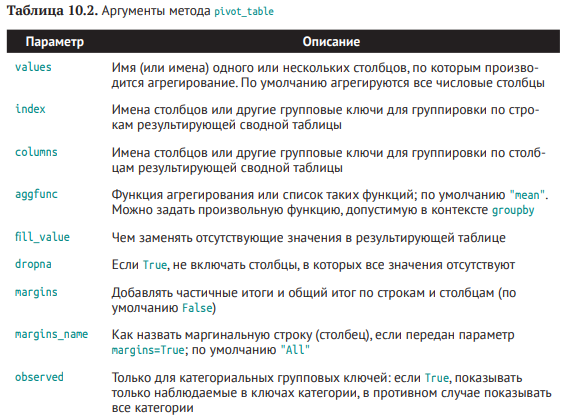

### Перекрестная табуляция: crosstab

Перекрестная таблица (cross-tabulation, или для краткости crosstab) – частный 
случай сводной таблицы, в  которой представлены частоты групп.

In [50]:
# различные пересечения

pd.crosstab([data1['Sex'],data1['age_category']],[data1['Pclass'],data1['Embarked']])  

Pclass                1         2          3       
Embarked              C  Q   S  C  Q   S   C  Q   S
Sex    age_category                                
female 0-5            0  0   1  1  0   4   5  0  10
       5-14           0  0   1  1  0   4   3  0   8
       14-25         12  0  14  3  0  16   6  7  26
       25-35          6  1  12  2  1  22   1  2  19
       35-60         20  0  15  0  0  20   1  1  12
       60+            0  0   1  0  0   0   0  0   1
male   0-5            0  0   2  1  0   7   1  2  10
       5-14           0  0   1  0  0   1   2  2  10
       14-25          8  0   3  2  0  25   9  3  90
       25-35          8  0  13  4  0  29  11  3  62
       35-60         17  1  36  1  1  25   2  2  40
       60+            3  0   9  0  0   3   0  2   2

In [51]:
pd.crosstab([data1['Sex']], [data1['Embarked']])  

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441
